# Neural Networks in Trading

#### Importing Libraries

We will start by importing a few libraries, the others will be imported as when they are used in the program at different stages. For now, we will import the libraries which will help us in importing and preparing the dataset for training and testing the model.

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Technical indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from sklearn import metrics

# Setting the random seed to a fixed number
import random
random.seed(42)

Random will be used to initialise the seed to a fixed number so that every time we run the code we start with the same seed.

#### Import dataset

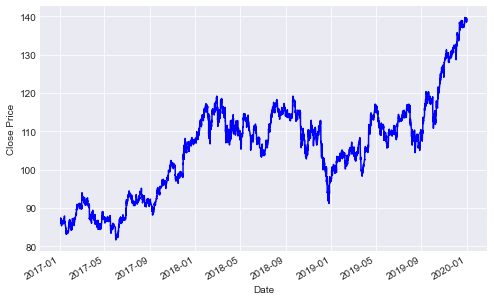

In [2]:
# The data is stored in the directory 'data_modules'
path = "../data_modules/"

# Read the data
data = pd.read_csv(path + 'JPM_2017_2019.csv', index_col=0)
data.index = pd.to_datetime(data.index)

data.close.plot(figsize=(8,5), color='b')
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.show()

#### Define Target, Features and Split the Data

In [3]:
import sys
sys.path.append("..")

from data_modules.utility import get_target_features
y, X = get_target_features(data)

split = int(0.8*len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], \
                                  y[:split], y[split:]

#### Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test_original = X_test.copy()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Another important step in data preprocessing is to standardise the dataset. This process makes the mean of all the input features equal to zero and also converts their variance to 1. This ensures that there is no bias while training the model due to the different scales of all input features. If this is not done, the neural network might get confused and give a higher weight to those features which have a higher average value than others.

We implement this step by importing the `StandardScaler` method from the `sklearn.preprocessing` library. We instantiate the variable sc with the `StandardScaler()` function. After which we use the `fit_transform` function for implementing these changes on the `X_train` and `X_test` datasets. The `y_train` and `y_test` sets contain binary values, hence they need not be standardised. Now that the datasets are ready, we may proceed with building the Artificial Neural Network using the Keras library.

#### Building the Artificial Neural Network

In [5]:
# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Now we will import the functions which will be used to build the Artificial Neural Network. We import the `Sequential` method from the `keras.models` library. This will be used to sequentially build the layers of the neural networks learning. The next method that we import will be the Dense function from the `keras.layers` library. 

This method will be used to build the layers of our Artificial Neural Network.

In [6]:
classifier = Sequential()

We instantiate the `Sequential()` function into the variable classifier. This variable will then be used to build the layers of the Artificial Neural Network learning in Python.

In [7]:
classifier.add(Dense(
        units = 128, 
        kernel_initializer = 'uniform', 
        activation = 'relu', 
        input_dim = X.shape[1]
        ))

To add layers into our Classifier, we make use of the add() function. The argument of the add function is the Dense() function, which in turn has the following arguments:

**Units:** This defines the number of nodes or neurons in that particular layer. We have set this value to 128, meaning there will be 128 neurons in our hidden layer.

**Kernel_initializer:** This defines the starting values for the weights of the different neurons in the hidden layer. We have defined this to be ‘uniform’, which means that the weights will be initialised with values from a uniform distribution.

**Activation:** This is the activation function for the neurons in the particular hidden layer. Here we define the function as the rectified Linear Unit function or ‘relu’.

**Input_dim:** This defines the number of inputs to the hidden layer, we have defined this value to be equal to the number of columns of our input feature dataframe. This argument will not be required in the subsequent layers, as the model will know how many outputs the previous layer produced.

In [8]:
classifier.add(Dense(
        units = 128, 
        kernel_initializer = 'uniform', 
        activation = 'relu'
        ))

We then add a second layer, with 128 neurons, with a uniform kernel initialiser and ‘relu’ as its activation function. We are only building two hidden layers in this neural network.

In [9]:
classifier.add(Dense(
        units = 1, 
        kernel_initializer = 'uniform', 
        activation = 'sigmoid'
        ))

The next layer that we build will be the output layer, from which we require a single output. Therefore, the units passed are 1, and the activation function is chosen to be the Sigmoid function because we would want the prediction to be a probability of market moving upwards.

In [10]:
classifier.compile(
                   optimizer = 'adam', 
                   loss = 'mean_squared_error', 
                   metrics = ['accuracy']
                   )

Finally, we compile the classifier by passing the following arguments:

**Optimizer:** The optimizer is chosen to be ‘adam’, which is an extension of the stochastic gradient descent.

**Loss:** This defines the loss to be optimised during the training period. We define this loss to be the mean squared error.

**Metrics:** This defines the list of metrics to be evaluated by the model during the testing and training phase. We have chosen accuracy as our evaluation metric.

In [11]:
classifier.fit(X_train, y_train, batch_size = 20, epochs = 7)

Epoch 1/7
773/773 [==============================] - 18s 2ms/step - loss: 0.2501 - accuracy: 0.5006
Epoch 2/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2499 - accuracy: 0.5099
Epoch 3/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2497 - accuracy: 0.5163
Epoch 4/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.5212
Epoch 5/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.5129
Epoch 6/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2494 - accuracy: 0.5233
Epoch 7/7
773/773 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5220


Now we need to fit the neural network that we have created to our train datasets. 

This is done by passing X_train, y_train, batch size and the number of epochs in the `fit()` function. 

The batch size refers to the number of data points that the model uses to compute the error before backpropagating the errors and making modifications to the weights. 

The number of epochs represents the number of times the training of the model will be performed on the train dataset.

With this, our Artificial Neural Network in Python has been compiled and is ready to make predictions.

#### Predicting the Movement of the Stock

In [12]:
predicted = classifier.predict(X_test)
predicted = np.where(predicted>0.5,1,0)

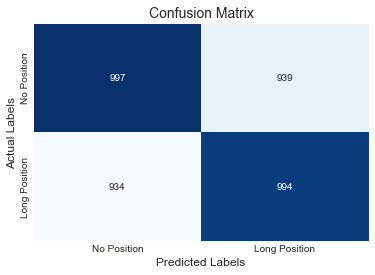

              precision    recall  f1-score   support

           0       0.52      0.51      0.52      1936
           1       0.51      0.52      0.51      1928

    accuracy                           0.52      3864
   macro avg       0.52      0.52      0.52      3864
weighted avg       0.52      0.52      0.52      3864



In [13]:
from data_modules.utility import get_metrics
get_metrics(y_test, predicted)

#### Computing Strategy Returns

In [14]:
# Calculate the percentage change
strategy_data = X_test_original[['pct_change']].copy()

# Predict the signals
strategy_data['predicted_signal'] = predicted

# Calculate the strategy returns
strategy_data['strategy_returns'] = \
              strategy_data['predicted_signal'].shift(1) * \
              strategy_data['pct_change']

# Drop the missing values
strategy_data.dropna(inplace=True)

strategy_data.head()

,pct_change,predicted_signal,strategy_returns
2019-05-28 12:15:00+00:00,0.000732,1,0.000732
2019-05-28 12:30:00+00:00,-0.000366,1,-0.000366
2019-05-28 12:45:00+00:00,0.000366,1,0.000366
2019-05-28 13:00:00+00:00,0.000091,1,0.000091
2019-05-28 13:15:00+00:00,-0.000091,1,-0.000091


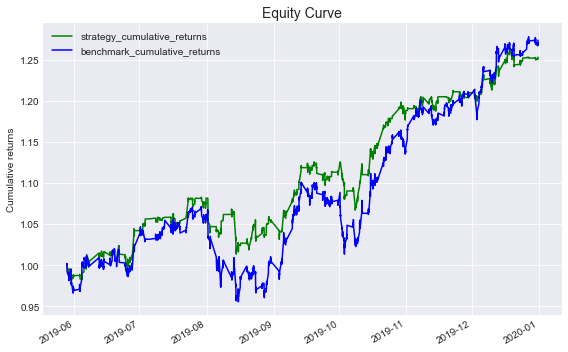

The maximum drawdown is -6.38%.


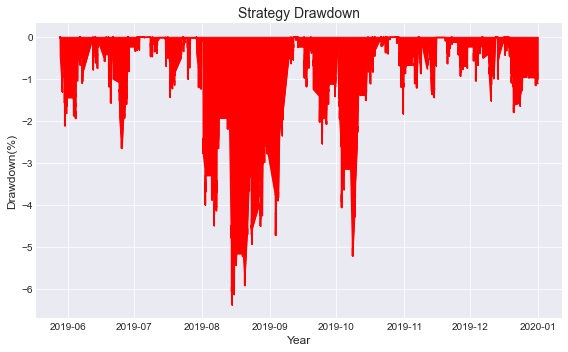

The Sharpe ratio is 2.75.


In [15]:
from data_modules.utility import get_performance
get_performance(strategy_data)

This is interesting! While the strategy returns were less than the benchmark returns, you should note that the drawdown percentage is relatively lower. Nevertheless, the neural network strategy can be improved by letting the algorithm process more data to improve its performance scores.